In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

por = pd.read_csv(r"C:\Users\Ariel\Documents\Canada\Durham\AIAlgorithm_AIDI1002\Lab3_14NovDue\LAB3\student\student-por_delimitor.csv")

print("Dataset read successfully!")

Dataset read successfully!


In [2]:
por

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   gender      649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
por.isnull().sum()

school        0
gender        0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Check the correlation
check the correlation between different variables us on how to proceed further with a corelation roadmap

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

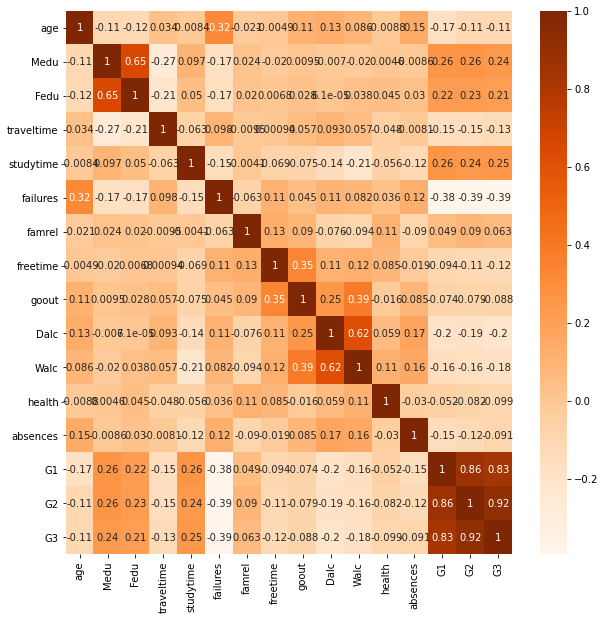

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(por.corr(),cbar=True,annot=True,cmap="Oranges")

# Data Modelling

<h2>Using G1, G2 to predict G3</h2>

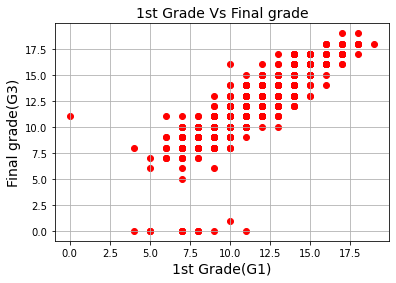

In [7]:
plt.scatter(por['G1'], por['G3'], color='red')
plt.title('1st Grade Vs Final grade', fontsize=14)
plt.xlabel('1st Grade(G1)', fontsize=14)
plt.ylabel('Final grade(G3)', fontsize=14)
plt.grid(True)
plt.show()

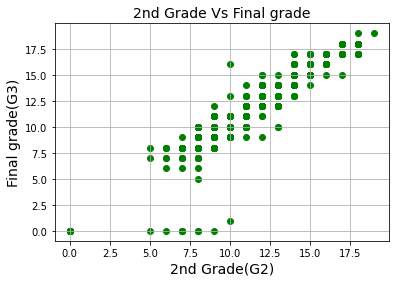

In [8]:
plt.scatter(por['G2'], por['G3'], color='green')
plt.title('2nd Grade Vs Final grade', fontsize=14)
plt.xlabel('2nd Grade(G2)', fontsize=14)
plt.ylabel('Final grade(G3)', fontsize=14)
plt.grid(True)
plt.show()

In [9]:
X = por[['G1','G2']] 
Y = por['G3']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print("sklearn results")
print("")
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_G1 = 17
New_G2 = 15
print ('Predicted Final Grade(G3): \n', regr.predict([[New_G1 ,New_G2]]))

sklearn results

Intercept: 
 -0.17128308798692338
Coefficients: 
 [0.14889649 0.89714029]
Predicted Final Grade(G3): 
 [15.81706171]


In [10]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print("statsmodels results")
print_model = model.summary()
print(print_model)

statsmodels results
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1799.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          9.02e-265
Time:                        23:55:48   Log-Likelihood:                -1070.7
No. Observations:                 649   AIC:                             2147.
Df Residuals:                     646   BIC:                             2161.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1713      0.215

# Interpreting the regression results - 2 variables
1. Adjusted R-squared: 0.847 -> good, 84.7% of the G3 can be explained by this model
2. std err: 0.215/0.036/0.034 -> good
3. P > |t|: < 0.05 -> statistically significant
<h1>G1, G2 can describe more than 84.7% of G3, standard errors are relatively low, P-value is smaller than 0.05. So G1, G2 with linear regression is a good model for G3 prediction.</h1>